### Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [ ]:
from pandas import read_csv
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
fraud=read_csv('Fraud_check.csv')

In [ ]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status']) 

In [ ]:
fraud['Marital.Status'].value_counts()

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [ ]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,2,68833,50047,10,YES
1,YES,0,33700,134075,18,YES
2,NO,1,36925,160205,30,YES
3,YES,2,50190,193264,15,YES
4,NO,1,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,0,76340,39492,7,YES
596,YES,0,69967,55369,2,YES
597,NO,0,47334,154058,0,YES
598,YES,1,98592,180083,17,NO


In [ ]:
fraud.insert(6,'tax_class'," ")

for i in range(0,len(fraud['Taxable.Income']),1):
    if fraud['Taxable.Income'].iloc[i]<=30000:
        fraud['tax_class'].iloc[i]='Risky'
    else:
        fraud['tax_class'].iloc[i]='Good'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,2,68833,50047,10,YES,Good
1,YES,0,33700,134075,18,YES,Good
2,NO,1,36925,160205,30,YES,Good
3,YES,2,50190,193264,15,YES,Good
4,NO,1,81002,27533,28,NO,Good


In [ ]:
fraud.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [ ]:
fraud.drop(['Taxable.Income'],axis=1,inplace=True)
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,2,50047,10,YES,Good
1,YES,0,134075,18,YES,Good
2,NO,1,160205,30,YES,Good
3,YES,2,193264,15,YES,Good
4,NO,1,27533,28,NO,Good


In [ ]:
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['Urban']= label_encoder.fit_transform(fraud['Urban'])
fraud['tax_class']= label_encoder.fit_transform(fraud['tax_class'])


In [ ]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [ ]:
fraud.iloc[:,2:4]=StandardScaler().fit_transform(fraud.iloc[:,2:4])
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


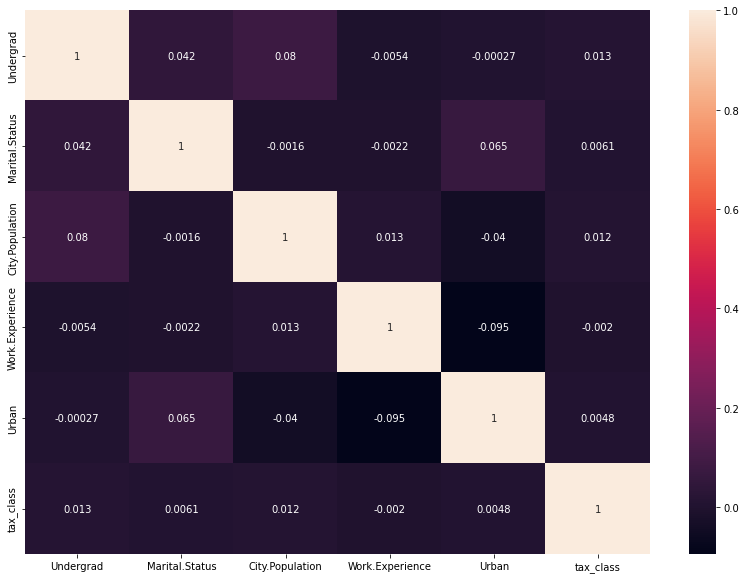

In [ ]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(fraud.corr(),annot=True)

In [ ]:
X=fraud.iloc[:,0:-1]
Y=fraud['tax_class']

# Random forest

In [ ]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10) #Bootstrap


In [ ]:
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7433333333333333


# Boosting classifer

In [ ]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 


kfold = KFold(n_splits=10) # evaluation method
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees) #Classifier
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7416666666666666


# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 15
seed=0
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.7916666666666666


# xgboost

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X=fraud.iloc[:,0:-1]
y=fraud['tax_class']

In [ ]:
# split data into train and test sets
seed = 0
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train, y_train)

XGBClassifier(n_estimators=90)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.26%


# lightgbm

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
clf=LGBMClassifier(learning_rate=0.001,num_leaves=10,max_depth=3,n_estimators=500)
clf.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.001, max_depth=3, n_estimators=500,
               num_leaves=10)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
prediction=[round(value) for value in y_pred]
accuracy=accuracy_score(y_test,prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.77%
